# 1. **Business understanding** #

Customer churn is a critical event for service providers, influencing business decisions and prompting actions for customer retention. To gain valuable insights into churn events, leveraging machine learning models becomes essential. These models can predict whether a customer is likely to churn, enabling proactive measures for customer retention. The results of these models can inform targeted campaigns, among other strategic initiatives.

**Business Problem**:
This report addresses the prediction of customer churn in a telecommunications service. The churn target variable is binary, with "yes" indicating customers who have abandoned the service and "no" for those who have not.

**Machine Learning Problem**:
Predicting churn is a classification problem, determining whether a user is likely to abandon the service or not. This poses a challenge due to the imbalanced distribution of classes, with the minority of customers tending to churn. To address this, we will explore various approaches and models to identify the most effective solution in this scenario.

# 2. **Data Understanding** #

1. Looking at the raw data, describe variables according to their types: interval-scaled, binary, nominal, ordinal, ratio-scaled. Be aware that there are specific methods suitable to each type of variable.


The dataset contains **5000 entries** and **18 variables**.
More information on the variables can be found here:
  • https://data.world/earino/churn/discuss/churn/3in3tgcr
  
Dicionário das variáveis (com tipo):

• CHURN (Abandono): Indica se o utilizador abandona ou não a empresa.
    
    Categorical - Binary (yes/no), asymmetric ("yes" is more important)

  • ACCOUNT LENGTH (Duração da conta): Duração das contas.
    
    Numerical - Continuous, ratio-scaled (inherent zero-point)

  • INTERNATIONAL PLAN (Plano internacional): Indica se o cliente cadastra um plano com chamadas e mensagens ao exterior.
   
    Categorical - Binary (yes/no), symmetric

  • VOICEMAIL PLAN (Plano de voicemail): Indica se o cliente cadastra um plano com voicemail.
    
    Categorical - Binary (yes/no), symmetric

  • NUMBER EMAIL MESSAGES (Número de mensagens de email): Indica o número de mensagens por email que o cliente efetuou.
   
    Numerical - Discrete (it needs to be an int), ratio-scaled

  • TOTAL DAY MINUTES (Total de minutos diários): Indica o número de minutos que o cliente falou durante o dia.
    
    Numerical - Continuous, ratio-scaled

  • TOTAL DAY CALLS (Total de chamadas diárias): Indica o número de chamadas que o utilizador efetuou
    diariamente.
    
    Numerical - Discrete, ratio-scaled

  • TOTAL DAY CHARGE (Cobrança total diária): Indica o valor que o utilizador pagará pelas chamadas ou
    mensagens realizadas durante o dia.
    
    Numerical - Continuos, ratio-scaled

  • TOTAL EVE MINUTES (Total de minutos à tarde): Indica o número total de minutos que o utilizador falou durante a tarde.
    
    Numerical - Continuos, ratio-scaled

  • TOTAL EVE CALLS (Total de chamadas à tarde): Indica o número total de chamadas que o utilizador efetuou durante a tarde.
   
    Numerical - Discrete, ratio-scaled

  • TOTAL EVE CHARGE (Cobrança total à tarde): Indica o valor que o utilizador pagará pelas chamadas ou
    mensagens feitas durante a tarde.
   
    Numerical - Continuos, ratio-scaled

  • TOTAL NIGHT MINUTES (Minutos noturnos): Indica o número de minutos falados durante a noite.
   
    Numerical - Continuos, ratio-scaled
  • TOTAL NIGHT CALLS (Chamadas noturnas): Indica o número de chamadas efetuadas pelo utilizador durante a noite.
   
    Numerical - Discrete, ratio-scaled

  • TOTAL NIGHT CHARGE (Cobrança total noturna): Indica o valor que o utilizador pagará pelas chamadas ou mensagens feitas durante a noite.
   
    Numerical - Continuos, ratio-scaled

  • TOTAL INTER MINUTES (Total de minutos internacionais): Indica o número de minutos em que o utilizador falou com familiares ou amigos no estranjeiro.
   
    Numerical - Continuos, ratio-scaled

  • TOTAL INTER CALLS (Total de chamadas internacionais): Indica o número de chamadas que o utilizador efetuou ao ligar para o estrangeiro.
   
    Numerical - Discrete, ratio-scaled

  • TOTAL INTER CHARGE (Cobrança total internacional): Indica o valor que o utilizador pagará pelas chamadas ou mensagens ao estrangeiro.
   
    Numerical - Continuos, ratio-scaled

  • CUSTOMER SERVICE CALLS (Chamadas de serviço ao cliente): Indica o número de chamadas que o utilizador efetuou ao pessoal de serviço ao cliente da empresa para relatar qualquer reclamação.
   
    Numerical - Discrete, ratio-scaled

2. Perform a preliminary analysis (summaries, spread measures, histograms, boxplots, density). These are interesting to be applied to the raw data to "uncover" inconsistencies, outliers, duplicates etc.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn_data.csv")
df

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,No,128.0,no,yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,No,107.0,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,No,137.0,no,no,0.0,243.4,NaN,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,No,84.0,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,No,75.0,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,50.0,no,yes,40.0,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,9.9,5.0,2.67,2.0
4996,Yes,152.0,no,no,0.0,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,14.7,2.0,3.97,3.0
4997,No,61.0,no,no,0.0,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,13.6,4.0,3.67,1.0
4998,No,109.0,no,no,0.0,188.8,67.0,32.10,171.7,92.0,14.59,224.4,89.0,NaN,8.5,6.0,2.30,0.0


Checking the duplicates

In [ ]:
# Check for all occurrences of duplicates
all_occurrences_of_duplicates = df[df.duplicated(keep=False)]

all_occurrences_of_duplicates

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls



There are no duplicates since the output from the df is empty

Understanding the distribution of "churn" and the other categorical features.

In [ ]:
df_cat = df[['churn', 'internationalPlan', 'voicemailPlan']]
df_cat.describe()

,churn,internationalPlan,voicemailPlan
count,5000,4950,4950
unique,2,2,2
top,No,no,no
freq,4293,4481,3638


- Counts on internationalplan and voicemailplan are less than churn, what indicates that there are missing values on these features
- High frequency of "No" values in the churn column, indicating an imbalanced dataset.
-Below we plot the distribution in the categorical binary values. It is clearly an imbalanced dataset.

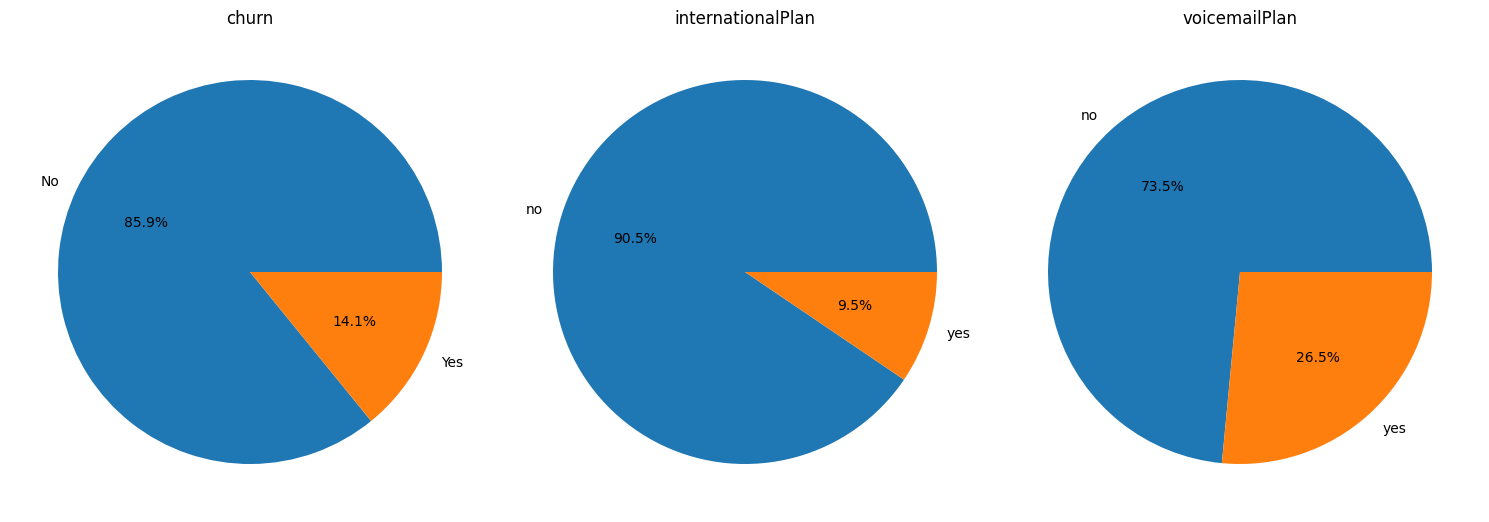

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15, 10))

for i, column in enumerate(df_cat.columns):
    labels = df_cat[column].value_counts().index
    sizes = df_cat[column].value_counts().values

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Understanding the distribution of numerical variables

In [ ]:
df_num = df.drop(['churn', 'internationalPlan', 'voicemailPlan'], axis='columns')
df_num.describe()

,accountLength,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
count,4951.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.718817,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- All the columns has NA values;

Inspection with boxplots

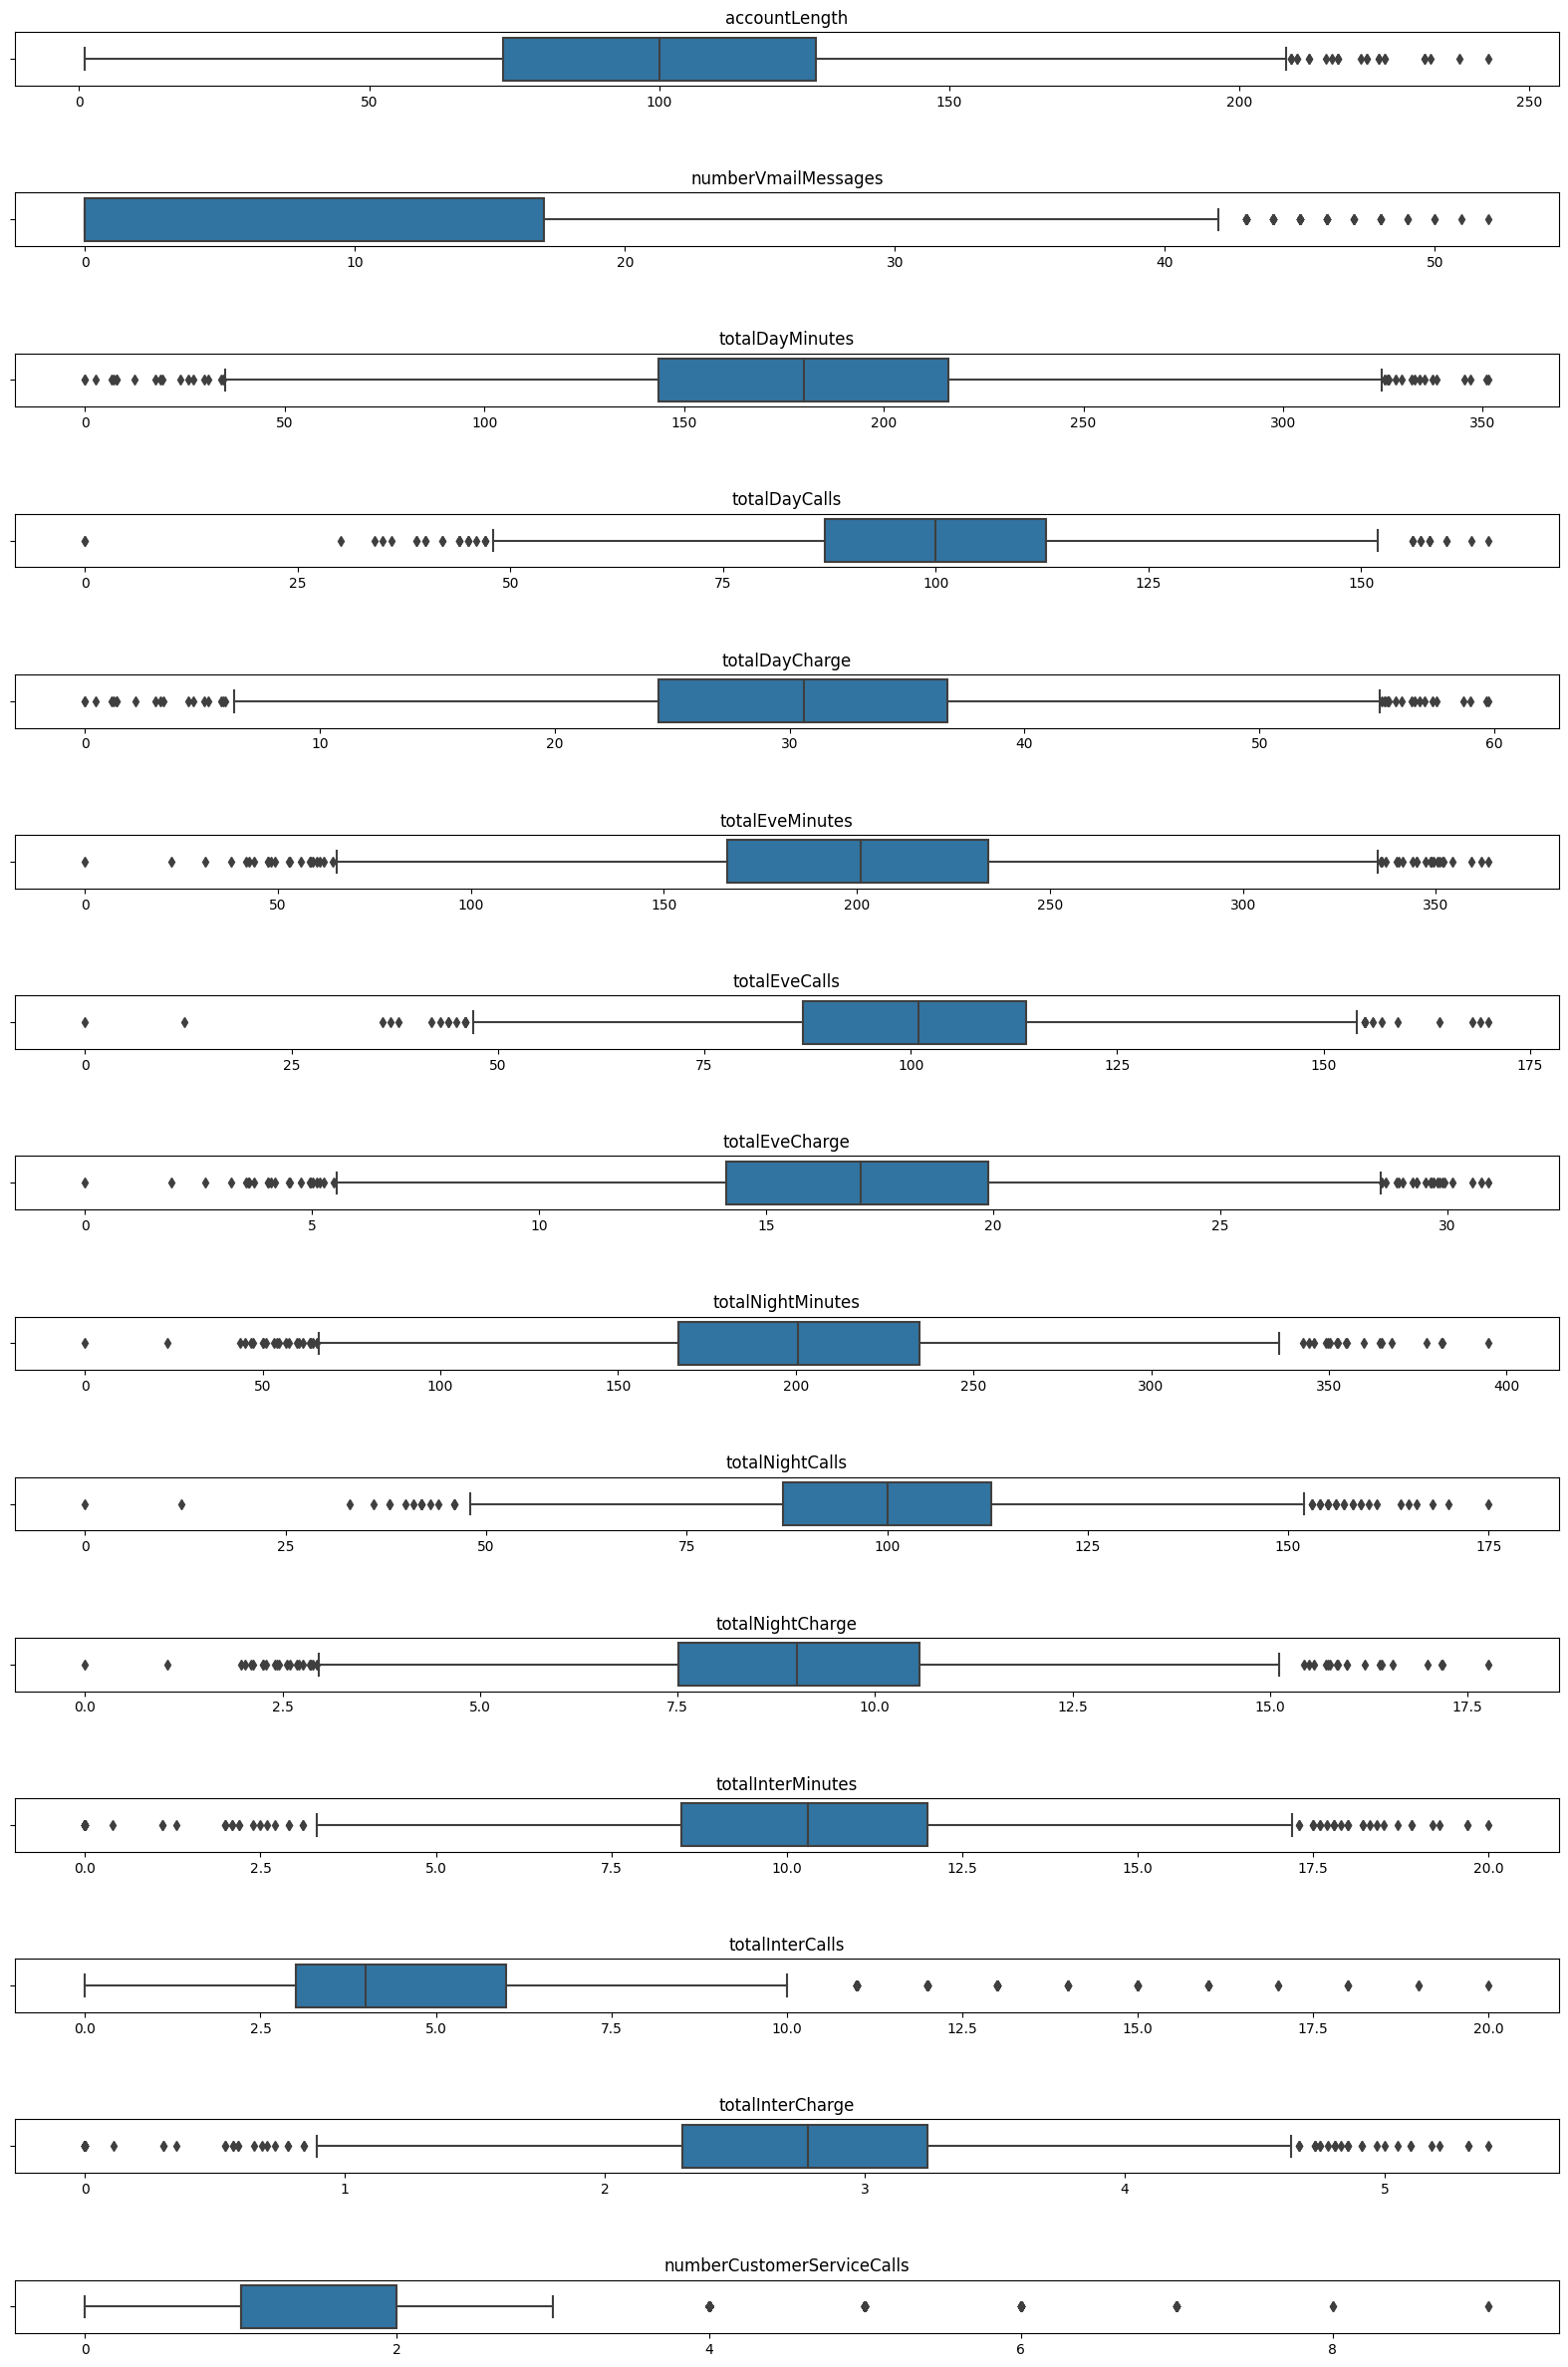

In [ ]:
# noinspection PyRedeclaration
fig, axes = plt.subplots(nrows=len(df_num.columns), figsize=(20, 2 * len(df_num.columns)), gridspec_kw={'hspace': 2})

for i, column in enumerate(df_num.columns):
    sns.boxplot(x=df_num[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Remove x-axis label

- Significant number of 0 emails and 1 customer service call
- There are no unrealistic outliers

Inspection with histograms

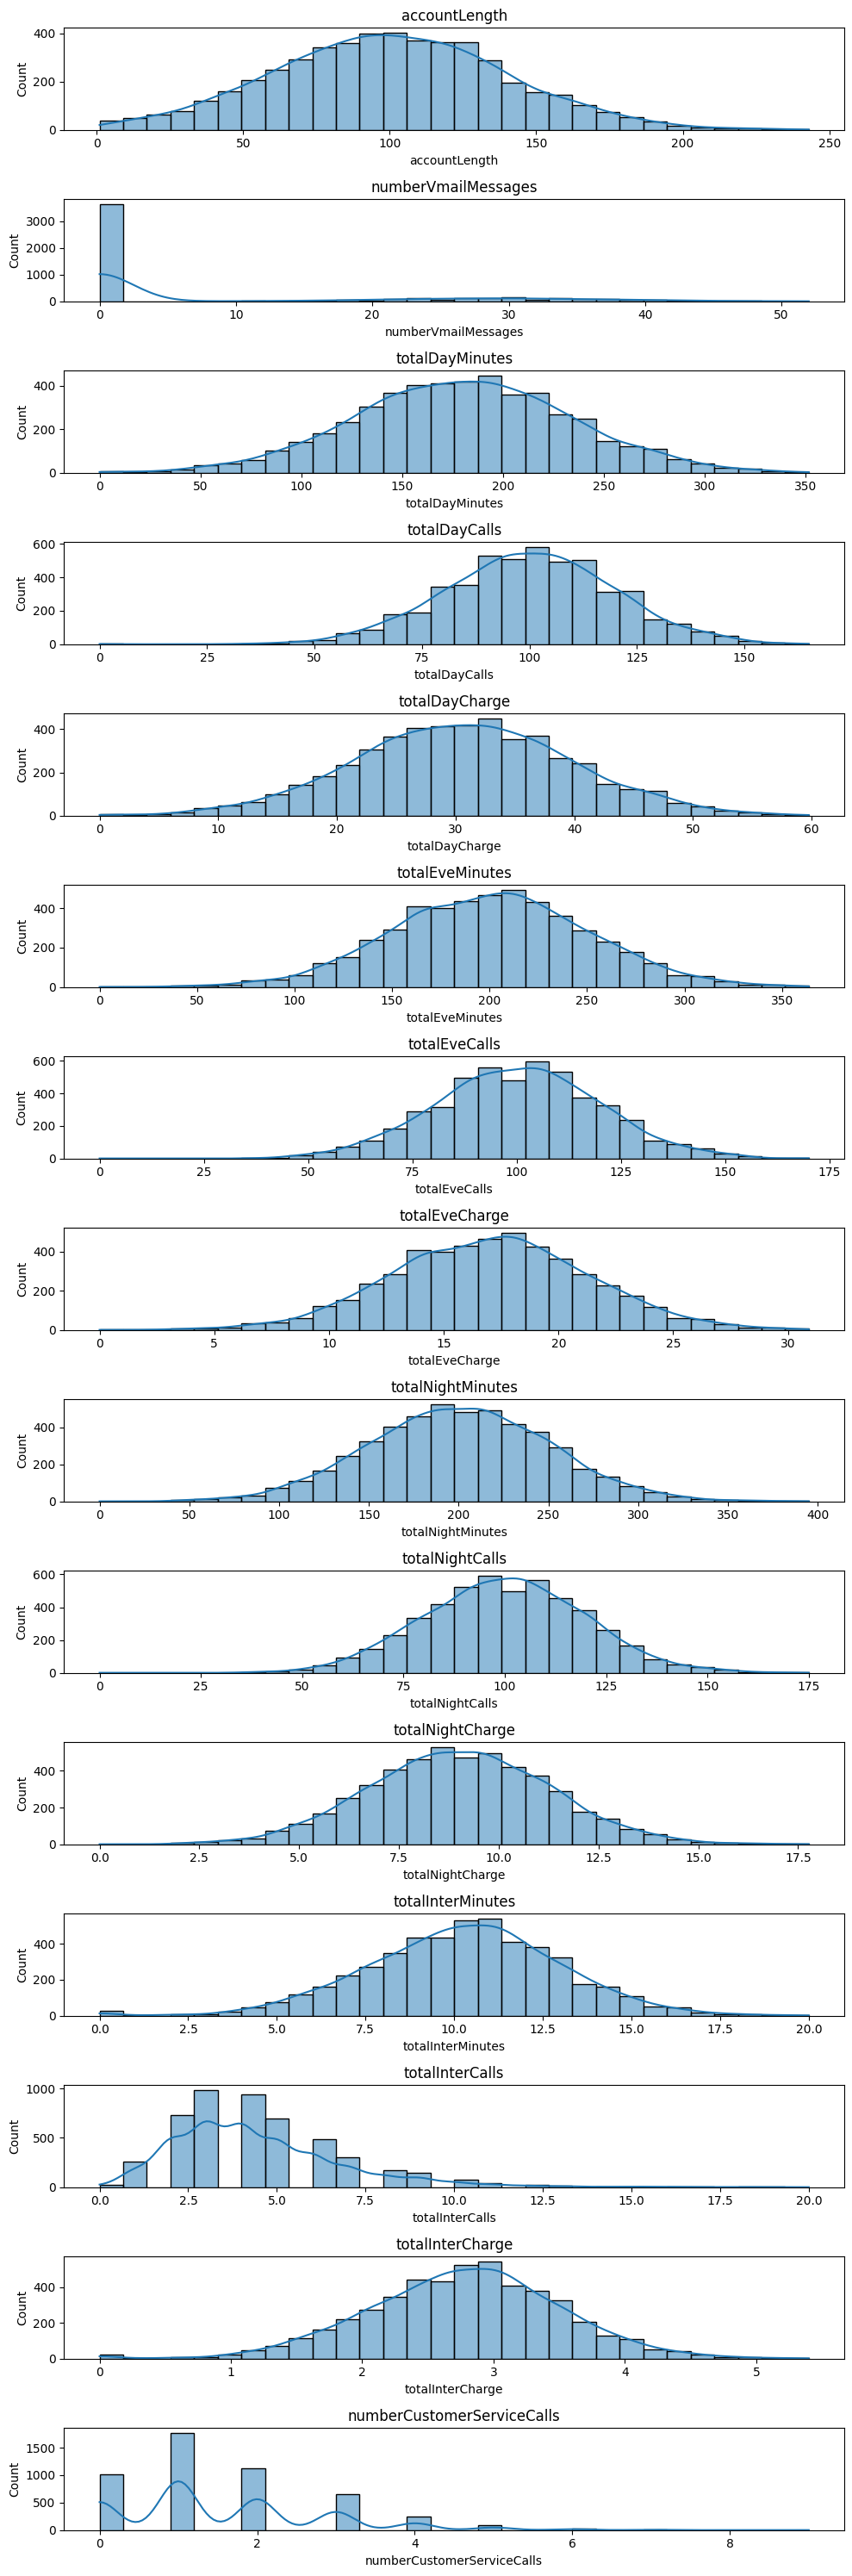

In [ ]:
fig, axes = plt.subplots(nrows=len(df_num.columns), figsize=(10, 2 * len(df_num.columns)))

# Loop through each column and create a distribution plot
for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], kde=True, ax=axes[i], bins=30)  # Using histplot with KDE for better visualization
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# 3. **Data preparation** #

## Data Cleaning ##

Cleaning decimal houses

In [ ]:
# variables that must be discrete:
df_cleaning = df
for column in df[["numberVmailMessages","totalDayCalls","totalEveCalls","totalNightCalls","totalInterCalls","numberCustomerServiceCalls"]]:
    df_cleaning[column] = df[column].astype("Int64") # converter a coluna para um tipo int que lida com valores NA

# variables that must have 1 decimal house:
for column in df[["accountLength","totalDayMinutes","totalEveMinutes","totalNightMinutes","totalInterMinutes"]]:
    df_cleaning[column] = df[column].round(1) # arredonda para 1 casa decimal

# variables that must have 2 decimal houses:
for column in df[["totalDayCharge","totalEveCharge","totalNightCharge","totalInterCharge"]]:
    df_cleaning[column] = df[column].round(2)

In [ ]:
df_cleaning

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,No,128.0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107.0,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137.0,no,no,0,243.4,<NA>,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84.0,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75.0,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,50.0,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,Yes,152.0,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,No,61.0,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,No,109.0,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,NaN,8.5,6,2.30,0


Handling NA values

In [ ]:
#Understanding the Missing values ratio
nan_percentage = pd.Series()

for column in df.columns:
    nan_percentage = (df.isna().sum()/len(df[column])) * 100

nan_percentage

<ipython-input-444-81ef2d52a1d1>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nan_percentage = pd.Series()


churn                         0.00
accountLength                 0.98
internationalPlan             1.00
voicemailPlan                 1.00
numberVmailMessages           1.00
totalDayMinutes               1.00
totalDayCalls                 1.00
totalDayCharge                1.00
totalEveMinutes               1.00
totalEveCalls                 1.00
totalEveCharge                1.00
totalNightMinutes             1.00
totalNightCalls               1.00
totalNightCharge              1.00
totalInterMinutes             1.00
totalInterCalls               1.00
totalInterCharge              1.00
numberCustomerServiceCalls    1.00
dtype: float64

## How is each feature correlated with the target variable (churn) ? ##

Encoding of the categorical variables to be able to do correlation analysis

In [ ]:
# Map 'Yes' to 1 and 'No' to 0 in the "churn" column
df_encoded = df_cleaning
df_encoded['churn'] = df_encoded['churn'].map({'Yes': 1, 'No': 0})
df_encoded["internationalPlan"] = df_encoded["internationalPlan"].map({'yes': 1, 'no': 0})
df_encoded["voicemailPlan"] = df_encoded["voicemailPlan"].map({'yes': 1, 'no': 0})
df_encoded

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,0,128.0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107.0,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137.0,0.0,0.0,0,243.4,<NA>,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84.0,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75.0,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,50.0,0.0,1.0,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,1,152.0,0.0,0.0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,0,61.0,0.0,0.0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,0,109.0,0.0,0.0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,NaN,8.5,6,2.30,0


In [ ]:
df["internationalPlan"] = df["internationalPlan"].astype("Int64")
df["voicemailPlan"] = df["voicemailPlan"].astype("Int64")

In [ ]:
correlation_matrix = df_encoded.corr() #pair-wise correlation
correlation_matrix

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
churn,1.000000,0.018030,0.257739,-0.109166,-0.100033,0.203456,0.015843,0.203629,0.089648,-0.008123,0.089903,0.043556,-0.006869,0.046459,0.062206,-0.045500,0.061496,0.218272
accountLength,0.018030,1.000000,0.009299,-0.008370,-0.016579,-0.002032,0.026608,0.000848,-0.008351,0.010261,-0.006567,0.003415,-0.013916,0.002028,0.000180,0.013804,-0.002015,-0.001164
internationalPlan,0.257739,0.009299,1.000000,0.008458,0.012478,0.025765,0.007711,0.024802,0.020192,0.000844,0.020056,-0.025526,0.004934,-0.025698,0.029532,0.006687,0.029564,-0.011273
voicemailPlan,-0.109166,-0.008370,0.008458,1.000000,0.954345,0.005343,0.000262,0.005499,0.025624,-0.004908,0.025560,0.007401,0.006825,0.007514,0.003239,-0.008195,0.004693,-0.013411
numberVmailMessages,-0.100033,-0.016579,0.012478,0.954345,1.000000,0.008371,0.001462,0.008060,0.021511,-0.006178,0.021395,0.004602,0.001303,0.005013,0.004232,-0.005106,0.004373,-0.009822
totalDayMinutes,0.203456,-0.002032,0.025765,0.005343,0.008371,1.000000,0.003292,0.992379,-0.012065,0.008590,-0.012963,0.009139,0.004781,0.008854,-0.021166,0.001703,-0.019034,-0.005588
totalDayCalls,0.015843,0.026608,0.007711,0.000262,0.001462,0.003292,1.000000,-0.000558,-0.001513,0.002660,-0.000358,0.005791,-0.006968,0.003363,0.015901,0.011160,0.013835,-0.009722
totalDayCharge,0.203629,0.000848,0.024802,0.005499,0.008060,0.992379,-0.000558,1.000000,-0.007494,0.009208,-0.007804,0.009312,0.003756,0.009024,-0.021769,0.001052,-0.018908,-0.003352
totalEveMinutes,0.089648,-0.008351,0.020192,0.025624,0.021511,-0.012065,-0.001513,-0.007494,1.000000,0.004650,1.000000,-0.018643,0.013485,-0.017422,0.000448,0.011040,-0.005340,-0.013153
totalEveCalls,-0.008123,0.010261,0.000844,-0.004908,-0.006178,0.008590,0.002660,0.009208,0.004650,1.000000,0.004467,0.003123,-0.013249,0.003388,-0.006909,0.001281,-0.005573,0.005610


The NAs are part of a maximum of 1% of the column, which is very low.

Check how many of the missing values ​​are churn=yes

## Data transforming ##

## Comparing and analysing distribution before drop NAs ##

In [ ]:
churn_yes = df_cleaning[df_cleaning["churn"] == 1] #selects rows where the condition is true
churn_yes

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
10,1,65.0,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
15,1,161.0,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
21,1,77.0,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5
33,1,12.0,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1
41,1,135.0,1,1,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,1,137.0,1,0,0,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,10.6,<NA>,2.86,1
4980,1,73.0,0,0,0,177.2,<NA>,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
4990,1,140.0,0,0,0,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,7.5,6,2.03,1
4991,1,97.0,0,0,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1


In [ ]:
churn_yes.describe()

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
count,707.0,700.000000,697.0,698.0,699.0,697.000000,699.0,702.000000,696.000000,703.0,701.000000,703.000000,704.0,703.000000,697.000000,698.0,697.000000,698.0
mean,1.0,102.002857,0.281205,0.146132,4.420601,207.406169,100.81402,35.211724,211.868103,99.847795,18.000071,205.871266,99.596591,9.275206,10.683644,4.157593,2.885179,2.272206
std,0.0,39.188882,0.44991,0.353492,11.222313,68.776311,20.791495,11.650464,51.616960,19.574415,4.382930,49.667286,19.987885,2.239386,2.781366,2.549556,0.752758,1.817451
min,1.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,70.900000,48.0,6.030000,47.400000,42.0,2.130000,0.000000,0.0,0.000000,0.0
25%,1.0,76.000000,0.0,0.0,0.0,153.200000,88.0,26.032500,176.200000,86.5,14.950000,171.650000,85.0,7.730000,8.800000,2.0,2.400000,1.0
50%,1.0,102.000000,0.0,0.0,0.0,212.800000,101.0,36.120000,211.200000,99.0,17.960000,205.900000,100.0,9.280000,10.600000,4.0,2.860000,2.0
75%,1.0,126.000000,1.0,0.0,0.0,266.100000,114.5,45.235000,249.300000,113.0,21.190000,240.600000,114.0,10.850000,12.700000,5.0,3.460000,4.0
max,1.0,225.000000,1.0,1.0,48.0,351.500000,165.0,59.760000,363.700000,168.0,30.910000,381.600000,158.0,17.170000,20.000000,20.0,5.400000,9.0


In [ ]:
churn_yes.isna().sum()

churn                          0
accountLength                  7
internationalPlan             10
voicemailPlan                  9
numberVmailMessages            8
totalDayMinutes               10
totalDayCalls                  8
totalDayCharge                 5
totalEveMinutes               11
totalEveCalls                  4
totalEveCharge                 6
totalNightMinutes              4
totalNightCalls                3
totalNightCharge               4
totalInterMinutes             10
totalInterCalls                9
totalInterCharge              10
numberCustomerServiceCalls     9
dtype: int64

In [ ]:
# Select rows where at least one column has NA
churn_yes_NA = churn_yes[churn_yes.isna().any(axis=1)]
churn_yes_NA

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
99,1,77.0,0,0,0,251.8,72,42.81,205.7,126,NaN,275.2,109,12.38,9.8,7,2.65,2
115,1,36.0,1,1,42,196.8,<NA>,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0
235,1,NaN,0,0,0,134.4,106,22.85,211.3,98,17.96,193.6,125,8.71,10.2,2,2.75,5
244,1,108.0,0,0,0,198.5,99,33.75,267.8,60,22.76,354.9,75,15.97,9.4,<NA>,2.54,0
258,1,92.0,1,0,0,62.6,111,10.64,180.6,126,15.35,221.7,80,NaN,10.4,2,2.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,1,65.0,0,0,0,143.6,98,24.41,187.7,96,15.95,200.2,104,9.01,NaN,2,2.51,3
4924,1,110.0,0,0,0,281.2,78,47.80,302.3,89,NaN,188.4,92,8.48,8.5,4,2.30,0
4953,1,90.0,0,<NA>,0,104.0,104,17.68,170.9,106,14.53,158.8,99,7.15,8.7,5,2.35,4
4959,1,137.0,1,0,0,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,10.6,<NA>,2.86,1


In [ ]:
na_percentage_churn_yes = churn_yes_NA.shape[0] / df[df['churn']==1].shape[0]
na_percentage_churn_yes

0.16548797736916548

In [ ]:
# Drop NAs
df_encoded_noNA = df_encoded.dropna(axis='index')
df_encoded_noNA

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,0,128.0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107.0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,0,84.0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75.0,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,0,118.0,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,75.0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4995,0,50.0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,1,152.0,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,0,61.0,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
#Analysing the distribution of churn yes after removing NAs
df_encoded_noNA_churn_yes = df_encoded_noNA[df_encoded_noNA['churn']==1]
df_encoded_noNA_churn_yes = df_encoded_noNA_churn_yes.reset_index(drop=True)
df_encoded_noNA_churn_yes.describe()

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
count,590.0,590.000000,590.0,590.0,590.0,590.000000,590.0,590.000000,590.000000,590.0,590.000000,590.000000,590.0,590.000000,590.000000,590.0,590.000000,590.0
mean,1.0,102.247458,0.276271,0.150847,4.737288,206.570678,100.942373,35.064593,212.611017,99.757627,18.072068,203.957797,99.501695,9.178220,10.675085,4.128814,2.879169,2.255932
std,0.0,39.513640,0.447532,0.358204,11.574244,69.302156,20.899957,11.781318,51.612546,19.422754,4.387037,48.432937,20.315821,2.179552,2.778233,2.492164,0.745997,1.806588
min,1.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,70.900000,48.0,6.030000,47.400000,42.0,2.130000,0.000000,0.0,0.000000,0.0
25%,1.0,76.000000,0.0,0.0,0.0,150.675000,88.0,25.510000,176.525000,86.0,15.002500,170.225000,84.0,7.660000,8.800000,2.0,2.400000,1.0
50%,1.0,102.000000,0.0,0.0,0.0,212.900000,101.0,36.015000,212.100000,100.0,18.030000,204.550000,99.0,9.205000,10.700000,4.0,2.890000,2.0
75%,1.0,126.000000,1.0,0.0,0.0,264.875000,114.75,45.027500,249.275000,113.0,21.187500,237.350000,114.0,10.682500,12.700000,5.0,3.430000,4.0
max,1.0,225.000000,1.0,1.0,48.0,351.500000,165.0,59.760000,363.700000,168.0,30.910000,327.300000,158.0,14.730000,19.200000,18.0,5.180000,9.0


In [ ]:
# Droping the categorical variables to check the distribution of only the numerical variables
df_noNA_churn_yes = df_encoded_noNA_churn_yes.drop(['internationalPlan', 'voicemailPlan','churn'], axis='columns')
df_yes = churn_yes.drop(['internationalPlan', 'voicemailPlan','churn'], axis='columns')
df_encoded_noNA_churn_yes

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,1,65.0,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
1,1,161.0,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
2,1,77.0,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5
3,1,12.0,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1
4,1,135.0,1,1,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1,132.0,0,0,0,265.8,122,45.19,285.1,90,24.23,183.6,124,8.26,13.6,9,3.67,2
586,1,114.0,1,1,28,136.4,93,23.19,170.0,90,14.45,191.5,73,8.62,14.6,4,3.94,2
587,1,140.0,0,0,0,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,7.5,6,2.03,1
588,1,97.0,0,0,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1


Analysing the difference in the data distribution before and after removing the NAs.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

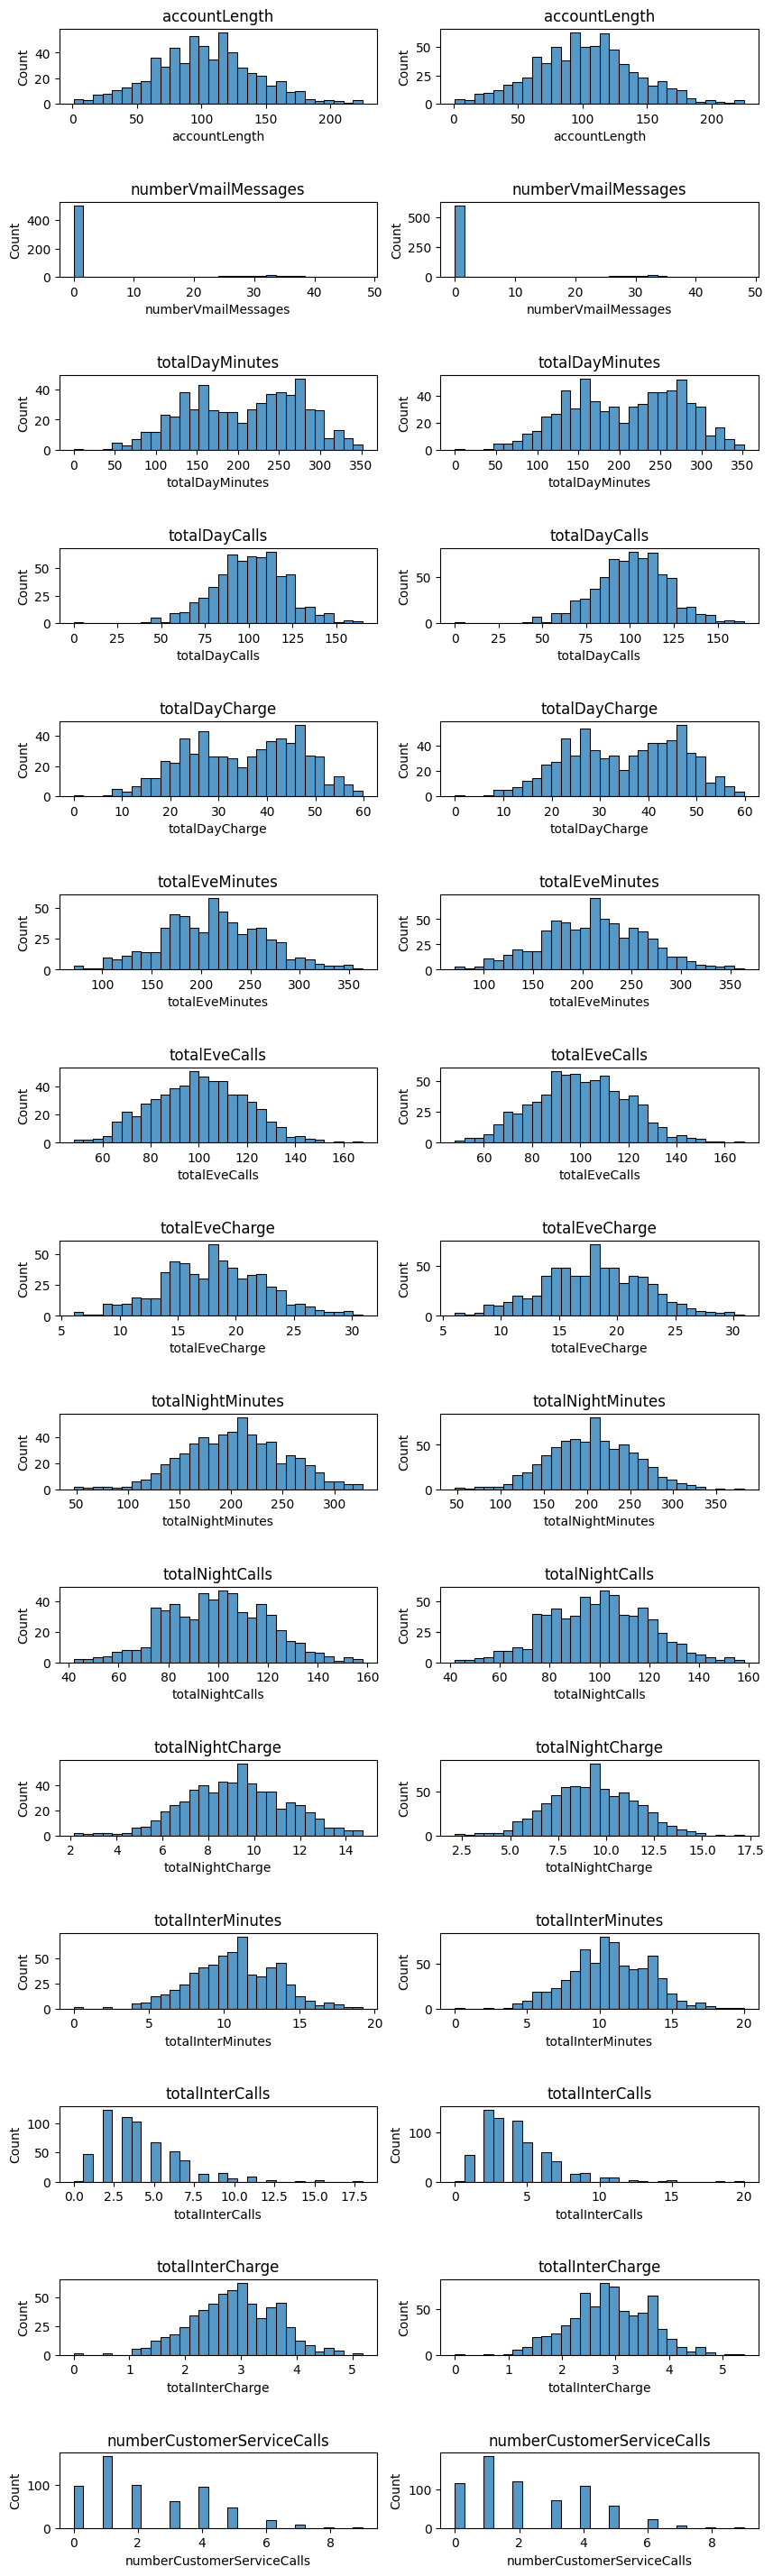

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=len(df_noNA_churn_yes.columns), figsize=(10, 2 * len(df_encoded_noNA_churn_yes.columns)))

# Loop through each column and create a distribution plot - df_without_NA_churn_yes - Sem NA = coluna 1
for i, column in enumerate(df_noNA_churn_yes.columns):
    sns.histplot(df_noNA_churn_yes[column], ax=axes[i,0], bins=30)  # Using histplot with KDE for better visualization
    axes[i,0].set_title(column)

# Loop through each column and create a distribution plot - df_yes - RAW = coluna 2
for i, column in enumerate(df_yes.columns):
    sns.histplot(df_yes[column], ax=axes[i,1], bins=30)  # Using histplot with KDE for better visualization
    axes[i,1].set_title(column)

# Adjust layout
#plt.tight_layout()
plt.subplots_adjust(hspace=1.3)
plt.show()

## Correlation Analysis

In [ ]:
correlation_churn_df = correlation_matrix.iloc[:,:1]
correlation_churn_df.rename(columns={'churn':'raw_bin'}, inplace=True)
correlation_churn_df

<ipython-input-457-53aecc188631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_churn_df.rename(columns={'churn':'raw_bin'}, inplace=True)


,raw_bin
churn,1.000000
accountLength,0.018030
internationalPlan,0.257739
voicemailPlan,-0.109166
numberVmailMessages,-0.100033
totalDayMinutes,0.203456
totalDayCalls,0.015843
totalDayCharge,0.203629
totalEveMinutes,0.089648
totalEveCalls,-0.008123


**Removing the NAs doesn't seem to affect the distribution of the numerical data where churn = yes (our smaller sample)**

In [ ]:
corr_noNa = df_encoded_noNA.corr()
corr_noNa

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
churn,1.000000,0.018310,0.247672,-0.105242,-0.089707,0.196215,0.015518,0.194363,0.096312,-0.010255,0.096306,0.030124,-0.004794,0.030120,0.060640,-0.050469,0.058125,0.212446
accountLength,0.018310,1.000000,0.008145,0.003268,-0.005654,-0.004557,0.021339,-0.007748,-0.014935,0.009964,-0.014936,0.004895,-0.004014,0.004884,-0.007025,0.017539,-0.007444,-0.000850
internationalPlan,0.247672,0.008145,1.000000,0.014272,0.019775,0.013792,0.010567,0.013440,0.018758,0.004357,0.018756,-0.034139,0.002437,-0.034133,0.036852,-0.000099,0.035113,-0.021232
voicemailPlan,-0.105242,0.003268,0.014272,1.000000,0.953841,0.014922,0.003326,0.016679,0.019236,-0.002209,0.019243,0.015245,-0.003116,0.015236,0.007201,-0.009826,0.009197,-0.015971
numberVmailMessages,-0.089707,-0.005654,0.019775,0.953841,1.000000,0.019151,0.007484,0.021157,0.015443,-0.000326,0.015449,0.014334,-0.009571,0.014317,0.001957,-0.003248,0.003670,-0.008291
totalDayMinutes,0.196215,-0.004557,0.013792,0.014922,0.019151,1.000000,0.001567,0.991480,-0.012354,0.011092,-0.012364,0.010269,0.014330,0.010256,-0.016608,0.001856,-0.017320,-0.007368
totalDayCalls,0.015518,0.021339,0.010567,0.003326,0.007484,0.001567,1.000000,0.001125,0.003540,-0.002736,0.003543,-0.001175,-0.016574,-0.001177,0.017519,0.009856,0.016873,-0.015017
totalDayCharge,0.194363,-0.007748,0.013440,0.016679,0.021157,0.991480,0.001125,1.000000,-0.011503,0.011176,-0.011512,0.011820,0.013233,0.011803,-0.018347,-0.001275,-0.019059,-0.005919
totalEveMinutes,0.096312,-0.014935,0.018758,0.019236,0.015443,-0.012354,0.003540,-0.011503,1.000000,0.012748,1.000000,-0.016658,0.013263,-0.016648,0.001425,0.008285,-0.000150,-0.018877
totalEveCalls,-0.010255,0.009964,0.004357,-0.002209,-0.000326,0.011092,-0.002736,0.011176,0.012748,1.000000,0.012768,-0.009249,-0.012893,-0.009225,-0.004377,0.002317,-0.005053,0.011178


  Remark to the features that:
- **are very correlated between each other**
  - numberVmailMessages / voicemailPlan (95%)
  - totalDayCharge / totalDayMinutes (99%)
  - totalEveCharge / totalEveMinutes (100%)
  - totalNightCharge / totalNightMinutes (~ 100%)
  - totalInterCharge / totalInterMinutes (99%)
- **are the most correlated with the target churn**
  - internationalPlan (~ 26%)
  - numberCustomerServiceCalls (~ 22%)
  - totalDayCharge (20.36%)
  - totalDayMinutes (20.34%)
  - voicemailPlan (~ 11%)
  - numberVmailMessages (10%)

Features that have a high correlation between each other allow dimensionality reduction by being able to have their sampling represented by just one of the high-correlation features. Features that have some relationship with the target are also more relevant than the others which have lower correlation

Between those that are very correlated between each other, the ones that will be selected will be the ones that correlate more with churn:
  - numberVmailMessages (10%) / voicemailPlan (~ 11%) -> **voicemailPlan**
  - totalDayCharge (20.36%) / totalDayMinutes (20.34%) -> **totalDayCharge**
  - totalEveCharge (8.99%) / totalEveMinutes (8.96%) -> **totalEveCharge**
  - totalNightCharge (4.6%) / totalNightMinutes (4.3%) -> **totalNightCharge**
  - totalInterCharge (6.1%) / totalInterMinutes (6.2%) -> **totalInterMinutes**

In [ ]:
correlation_churn_df['bin_noNa'] = corr_noNa['churn']
correlation_churn_df

<ipython-input-459-4ff049bd1e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_churn_df['bin_noNa'] = corr_noNa['churn']


,raw_bin,bin_noNa
churn,1.000000,1.000000
accountLength,0.018030,0.018310
internationalPlan,0.257739,0.247672
voicemailPlan,-0.109166,-0.105242
numberVmailMessages,-0.100033,-0.089707
totalDayMinutes,0.203456,0.196215
totalDayCalls,0.015843,0.015518
totalDayCharge,0.203629,0.194363
totalEveMinutes,0.089648,0.096312
totalEveCalls,-0.008123,-0.010255


## Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()
#diferentes abordagens de normalização
minmax_df_encoded_noNA = pd.DataFrame(minmax_scaler.fit_transform(df_encoded_noNA), columns=df_encoded_noNA.columns)
zscore_df_encoded_noNA = pd.DataFrame(zscore_scaler.fit_transform(df_encoded_noNA), columns=df_encoded_noNA.columns)
minmax_df_encoded_noNA

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,0.0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.507614,0.157895,0.507519,0.111111
1,0.0,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.695431,0.157895,0.695489,0.111111
2,0.0,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.335025,0.368421,0.334586,0.222222
3,0.0,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.512690,0.157895,0.513158,0.333333
4,0.0,0.483471,1.0,0.0,0.000000,0.635562,0.593939,0.635542,0.606544,0.594118,0.606600,0.516203,0.674286,0.516601,0.319797,0.315789,0.319549,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,0.0,0.305785,0.0,0.0,0.000000,0.485633,0.612121,0.485609,0.530932,0.741176,0.530896,0.326835,0.594286,0.326956,0.350254,0.368421,0.349624,0.111111
4203,0.0,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.502538,0.263158,0.501880,0.222222
4204,1.0,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.746193,0.105263,0.746241,0.333333
4205,0.0,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.690355,0.210526,0.689850,0.111111


In [ ]:
zscore_df_encoded_noNA

,churn,accountLength,internationalPlan,voicemailPlan,numberVmailMessages,totalDayMinutes,totalDayCalls,totalDayCharge,totalEveMinutes,totalEveCalls,totalEveCharge,totalNightMinutes,totalNightCalls,totalNightCharge,totalInterMinutes,totalInterCalls,totalInterCharge,numberCustomerServiceCalls
0,-0.403879,0.690549,-0.325486,1.661206,1.283796,1.568268,0.493599,1.570496,-0.060334,-0.063503,-0.060146,0.884896,-0.437503,0.884174,-0.095111,-0.585670,-0.097570,-0.435779
1,-0.403879,0.164407,-0.325486,1.661206,1.358115,-0.345864,1.146894,-0.345558,-0.097657,0.137708,-0.097122,1.077816,0.163272,1.078641,1.249081,-0.585670,1.250245,-0.435779
2,-0.403879,-0.411844,3.072329,-0.601972,-0.574186,2.202614,-1.466284,2.205189,-2.722051,-0.616834,-2.722435,-0.065784,-0.537633,-0.066067,-1.330316,1.046872,-1.337560,0.330020
3,-0.403879,-0.637333,3.072329,-0.601972,-0.574186,-0.251545,0.644359,-0.250844,-1.024838,1.093460,-1.023839,-0.264671,1.064436,-0.264954,-0.058782,-0.585670,-0.057136,1.095819
4,-0.403879,0.440006,3.072329,-0.601972,-0.574186,0.797067,-0.109442,0.798631,0.395399,0.037102,0.395124,0.073437,0.914242,0.075364,-1.439304,0.638736,-1.445385,-1.201579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,-0.403879,-0.637333,-0.325486,-0.601972,-0.574186,-0.177569,0.041318,-0.176815,-0.144801,1.294671,-0.145653,-1.414238,0.213337,-1.414082,-1.221327,1.046872,-1.229735,-0.435779
4203,-0.403879,-1.263693,-0.325486,1.661206,2.398585,1.024544,1.347907,1.026163,0.442544,1.294671,0.443656,1.935019,0.814113,1.936068,-0.131441,0.230601,-0.138004,0.330020
4204,2.475986,1.291855,-0.325486,-0.601972,-0.574186,0.072101,-0.511469,0.072490,1.106500,-1.371375,1.106917,0.266357,0.663919,0.265412,1.612377,-0.993805,1.614155,1.095819
4205,-0.403879,-0.988095,-0.325486,-0.601972,-0.574186,-0.734239,-0.561723,-0.734213,-0.543568,1.395277,-0.543148,0.242491,-0.137115,0.243314,1.212752,-0.177535,1.209811,-0.435779


In [ ]:
#Evaluate how the different approaches of normalization affect the corr with churn
corr_minmax_df_encoded_noNA = minmax_df_encoded_noNA.corr()
corr_zscore_df_encoded_noNA = zscore_df_encoded_noNA.corr()

#Add the results of the correlation with churn to the correlation df
correlation_churn_df['bin_noNa_minmax'] = corr_minmax_df_encoded_noNA.loc['churn']
correlation_churn_df['bin_noNa_zscore'] = corr_zscore_df_encoded_noNA.loc['churn']

correlation_churn_df

<ipython-input-462-fc42df73e332>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_churn_df['bin_noNa_minmax'] = corr_minmax_df_encoded_noNA.loc['churn']
<ipython-input-462-fc42df73e332>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_churn_df['bin_noNa_zscore'] = corr_zscore_df_encoded_noNA.loc['churn']


,raw_bin,bin_noNa,bin_noNa_minmax,bin_noNa_zscore
churn,1.000000,1.000000,1.000000,1.000000
accountLength,0.018030,0.018310,0.018310,0.018310
internationalPlan,0.257739,0.247672,0.247672,0.247672
voicemailPlan,-0.109166,-0.105242,-0.105242,-0.105242
numberVmailMessages,-0.100033,-0.089707,-0.089707,-0.089707
totalDayMinutes,0.203456,0.196215,0.196215,0.196215
totalDayCalls,0.015843,0.015518,0.015518,0.015518
totalDayCharge,0.203629,0.194363,0.194363,0.194363
totalEveMinutes,0.089648,0.096312,0.096312,0.096312
totalEveCalls,-0.008123,-0.010255,-0.010255,-0.010255


In [ ]:
correlation_churn_df.sort_values(by='bin_noNa_minmax', ascending=False)
correlation_churn_df

,raw_bin,bin_noNa,bin_noNa_minmax,bin_noNa_zscore
churn,1.000000,1.000000,1.000000,1.000000
accountLength,0.018030,0.018310,0.018310,0.018310
internationalPlan,0.257739,0.247672,0.247672,0.247672
voicemailPlan,-0.109166,-0.105242,-0.105242,-0.105242
numberVmailMessages,-0.100033,-0.089707,-0.089707,-0.089707
totalDayMinutes,0.203456,0.196215,0.196215,0.196215
totalDayCalls,0.015843,0.015518,0.015518,0.015518
totalDayCharge,0.203629,0.194363,0.194363,0.194363
totalEveMinutes,0.089648,0.096312,0.096312,0.096312
totalEveCalls,-0.008123,-0.010255,-0.010255,-0.010255


With these results, we decided to use the values escaled in range from 0 to 1 (using the minmax) normalization because there were no unrealistic outliers. After this escaling, we decided to use the 8 more correlated features

In [ ]:
df_intermediate_norm = minmax_df_encoded_noNA[['churn', 'internationalPlan', 'numberCustomerServiceCalls', 'totalDayMinutes', 'totalDayCharge', 'totalEveMinutes', 'totalEveCharge', 'voicemailPlan', 'numberVmailMessages']]
df_encoded_noNA_FeatureSelection = df_encoded_noNA[['churn', 'internationalPlan', 'numberCustomerServiceCalls', 'totalDayMinutes', 'totalDayCharge', 'totalEveMinutes', 'totalEveCharge', 'voicemailPlan', 'numberVmailMessages']]
df_intermediate_norm

,churn,internationalPlan,numberCustomerServiceCalls,totalDayMinutes,totalDayCharge,totalEveMinutes,totalEveCharge,voicemailPlan,numberVmailMessages
0,0.0,0.0,0.111111,0.754196,0.754183,0.542755,0.542866,1.0,0.480769
1,0.0,0.0,0.111111,0.459744,0.459672,0.537531,0.537690,1.0,0.500000
2,0.0,1.0,0.222222,0.851778,0.851740,0.170195,0.170171,0.0,0.000000
3,0.0,1.0,0.333333,0.474253,0.474230,0.407754,0.407959,0.0,0.000000
4,0.0,1.0,0.000000,0.635562,0.635542,0.606544,0.606600,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
4202,0.0,0.0,0.111111,0.485633,0.485609,0.530932,0.530896,0.0,0.000000
4203,0.0,0.0,0.222222,0.670555,0.670515,0.613143,0.613394,1.0,0.769231
4204,1.0,0.0,0.333333,0.524040,0.523929,0.706076,0.706244,0.0,0.000000
4205,0.0,0.0,0.111111,0.400000,0.399933,0.475117,0.475251,0.0,0.000000


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

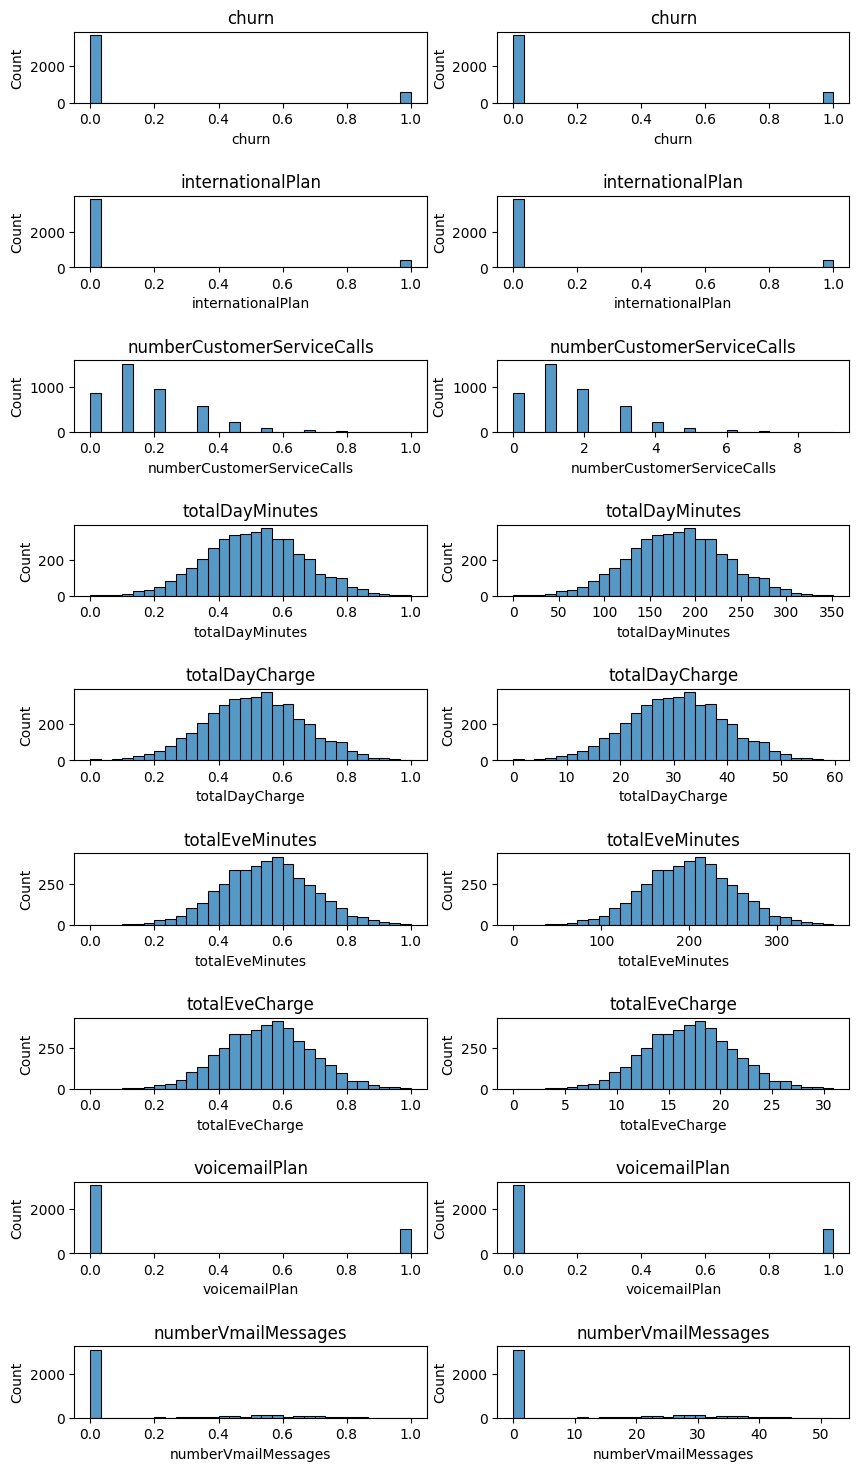

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=len(df_intermediate_norm.columns), figsize=(10, 2 * len(df_intermediate_norm.columns)))

# Loop through each column and create a distribution plot - df_intermeadiate_FeatureSelection - Sem NA = coluna 1
for i, column in enumerate(df_intermediate_norm.columns):
    sns.histplot(df_intermediate_norm[column], ax=axes[i,0], bins=30)  # Using histplot with KDE for better visualization
    axes[i,0].set_title(column)

# Loop through each column and create a distribution plot - df_num_cat_without_NA_FeatureSelection - RAW = coluna 2
for i, column in enumerate(df_encoded_noNA_FeatureSelection.columns):
    sns.histplot(df_encoded_noNA_FeatureSelection[column], ax=axes[i,1], bins=30)  # Using histplot with KDE for better visualization
    axes[i,1].set_title(column)

# Adjust layout
#plt.tight_layout()
plt.subplots_adjust(hspace=1.3)
plt.show()

In [ ]:
#Highlighting and removing the redundant variables
corr_df_intermediate_FeatureSelection_norm = df_intermediate_norm.corr()
corr_df_intermediate_FeatureSelection_norm

,churn,internationalPlan,numberCustomerServiceCalls,totalDayMinutes,totalDayCharge,totalEveMinutes,totalEveCharge,voicemailPlan,numberVmailMessages
churn,1.000000,0.247672,0.212446,0.196215,0.194363,0.096312,0.096306,-0.105242,-0.089707
internationalPlan,0.247672,1.000000,-0.021232,0.013792,0.013440,0.018758,0.018756,0.014272,0.019775
numberCustomerServiceCalls,0.212446,-0.021232,1.000000,-0.007368,-0.005919,-0.018877,-0.018891,-0.015971,-0.008291
totalDayMinutes,0.196215,0.013792,-0.007368,1.000000,0.991480,-0.012354,-0.012364,0.014922,0.019151
totalDayCharge,0.194363,0.013440,-0.005919,0.991480,1.000000,-0.011503,-0.011512,0.016679,0.021157
totalEveMinutes,0.096312,0.018758,-0.018877,-0.012354,-0.011503,1.000000,1.000000,0.019236,0.015443
totalEveCharge,0.096306,0.018756,-0.018891,-0.012364,-0.011512,1.000000,1.000000,0.019243,0.015449
voicemailPlan,-0.105242,0.014272,-0.015971,0.014922,0.016679,0.019236,0.019243,1.000000,0.953841
numberVmailMessages,-0.089707,0.019775,-0.008291,0.019151,0.021157,0.015443,0.015449,0.953841,1.000000


These 2 features are very correlated with others, so they can be dropped

In [ ]:
df_intermediate_norm = df_intermediate_norm.drop(['totalDayCharge', 'totalEveCharge'], axis='columns')

In [ ]:
df_intermediate_norm

,churn,internationalPlan,numberCustomerServiceCalls,totalDayMinutes,totalEveMinutes,voicemailPlan,numberVmailMessages
0,0.0,0.0,0.111111,0.754196,0.542755,1.0,0.480769
1,0.0,0.0,0.111111,0.459744,0.537531,1.0,0.500000
2,0.0,1.0,0.222222,0.851778,0.170195,0.0,0.000000
3,0.0,1.0,0.333333,0.474253,0.407754,0.0,0.000000
4,0.0,1.0,0.000000,0.635562,0.606544,0.0,0.000000
...,...,...,...,...,...,...,...
4202,0.0,0.0,0.111111,0.485633,0.530932,0.0,0.000000
4203,0.0,0.0,0.222222,0.670555,0.613143,1.0,0.769231
4204,1.0,0.0,0.333333,0.524040,0.706076,0.0,0.000000
4205,0.0,0.0,0.111111,0.400000,0.475117,0.0,0.000000


In [ ]:
df_intermediate_norm['churn'] = df_intermediate_norm['churn'].astype(int)
df_intermediate_norm['internationalPlan'] = df_intermediate_norm['internationalPlan'].astype(int)
df_intermediate_norm['voicemailPlan'] = df_intermediate_norm['voicemailPlan'].astype(int)
df_intermediate_norm


,churn,internationalPlan,numberCustomerServiceCalls,totalDayMinutes,totalEveMinutes,voicemailPlan,numberVmailMessages
0,0,0,0.111111,0.754196,0.542755,1,0.480769
1,0,0,0.111111,0.459744,0.537531,1,0.500000
2,0,1,0.222222,0.851778,0.170195,0,0.000000
3,0,1,0.333333,0.474253,0.407754,0,0.000000
4,0,1,0.000000,0.635562,0.606544,0,0.000000
...,...,...,...,...,...,...,...
4202,0,0,0.111111,0.485633,0.530932,0,0.000000
4203,0,0,0.222222,0.670555,0.613143,1,0.769231
4204,1,0,0.333333,0.524040,0.706076,0,0.000000
4205,0,0,0.111111,0.400000,0.475117,0,0.000000


This is our data after the preprocessing step.

 # 4. **Modeling** #

Considering we have an classification problem with inbalanced dataset, some classification models can perform better in this case. We will test the listed models and evaluate their performance:
- kNN: Uses the distance measure between the points considering k neighbors. Requires data normalization, so can be adopted for our problem.
- Naive Bayes: Class-conditional independence (analyse features correlation), assumes Gaussian distribution for continuous features. Can not be a good approach for our problem, need further evaluation.
- Decision Trees (DT): Very good for data with low resolution, high granularity. (High information gain in the events), hyperparameters have high significance. This models can have good performance in the imbalanced datasets depending on the entropy of the features/lables.
- Tree ensembles: Ensembles can boost the performance of the Decision Trees since it replicates and evaluate DT models iteratively giving weights to the best models along the iterations.
- Support Vector Classifier (SVC): Use the SVM to create and evaluate functions that can separate the data into classes.
- Neural Network Classifier (Multi-layer Perceptron Classifier): Use multi-layer weighted neural network to find the best weighted nodes for data classification. Requires normalization and has high computational cost. Have many hyperparameters that can be tunned, but as previously mentioned it is costly.



## Utils

Definition of several functions used in this step.

In [ ]:
#def a function to validate the classes proportion:
def validate_classes_prop(data):
  if isinstance(data, pd.Series):
    data_proportion = data.value_counts(normalize=True)
    data_count = data.value_counts()
    print("It's a Series")
    print("The percentage of Churn = yes is: ", (data_proportion.iloc[1])*100, "%", "with ", data_count.iloc[1], "entries")
    print("The percentage of Churn = no is: ",(data_proportion.iloc[0]*100), "%", "with ", data_count.iloc[0], "entries")
  elif isinstance(data, pd.DataFrame):
    print("It's a Dataframe")
    print("The percentage of Churn = yes is: ",(data[data['churn']==1].shape[0]/data['churn'].shape[0])*100,"%", "with", data[data['churn']==1].shape[0], "entries")
    print("The percentage of Churn = no is: ",(data[data['churn']==0].shape[0]/data['churn'].shape[0])*100,"%", data[data['churn']==0].shape[0], "entries")


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
def evaluate_model(dict_eval_metrics,y_evaluation,y_prediction):
  eval_metric_functions = {'accuracy':accuracy_score(y_evaluation, y_prediction),
                           'recall': recall_score(y_evaluation, y_prediction),
                           'precision': precision_score(y_evaluation, y_prediction),
                           'f1': f1_score(y_evaluation, y_prediction)}

  for metric in eval_metric_functions.keys():
    # check if the evaluation metric is in the dictionary
    if metric in dict_eval_metrics:
    # append the eval metric value to the list
      dict_eval_metrics[metric].append(eval_metric_functions.get(metric))
    else:
    # if the eval metric doesn't exist, create a new entry
      dict_eval_metrics[metric] = [eval_metric_functions.get(metric)]

  return dict_eval_metrics

In [ ]:
#use the SMOTE only in the train folds of the CV splits.
#return an dict with the scores of the model in CV step
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from statistics import mean


def cross_val_smote_trainFold(model, X, y, oversampling=False, verbose_out=False):
  sf = StratifiedKFold(n_splits=10)

  scores_cv = dict()

  for idx, (idx_train, idx_val) in enumerate(sf.split(X_train,y_train)):
    X_fold_train = X.iloc[idx_train]
    y_fold_train = y.iloc[idx_train]

    #if we want to apply SMOTE approach
    if oversampling:
      sm = SMOTE(random_state=13)
      X_fold_train, y_fold_train = sm.fit_resample(X_fold_train,y_fold_train)

    #since the data is balanced already in the TRAIN FOLD, let's train it
    model.fit(X_fold_train, y_fold_train)

    X_fold_validation = X.iloc[idx_val]
    y_fold_validation = y.iloc[idx_val]

    #Perform the classification validation in a fold without Oversampling
    prediction = model.predict(X_fold_validation)

    #evaluate the model performance
    scores_cv = evaluate_model(dict_eval_metrics=scores_cv, y_evaluation=y_fold_validation, y_prediction=prediction)

    #use the verbose output when needed to vizualise some details
    if verbose_out:
      print(f'Split {idx}')
      print("The train fold has the proportions:")
      validate_classes_prop(y_fold_train)
      print("The validation fold has the proportions:")
      validate_classes_prop(y_fold_validation)

  #add the means of evaluation metrics to the scores_cv dict
  scores_cv['CV_mean_accuracy'] = mean(scores_cv.get('accuracy'))
  scores_cv['CV_mean_recall'] = mean(scores_cv.get('recall'))
  scores_cv['CV_mean_precision'] = mean(scores_cv.get('precision'))
  scores_cv['CV_mean_f1'] = mean(scores_cv.get('f1'))

  return scores_cv


In [ ]:
def append_model_evaluation(df_to_append_into, model, used_SMOTE=False, cv_used_SMOTE=False, model_CV_scores=None, model_test_scores=None):
  # new model data
  new_model = {'model': model,
               'train_smote': used_SMOTE,
               'CV_train_smote': cv_used_SMOTE,
               'CV_mean_accuracy': model_CV_scores.get('CV_mean_accuracy'),
               'CV_mean_recall': model_CV_scores.get('CV_mean_recall'),
               'CV_mean_precision' : model_CV_scores.get('CV_mean_precision'),
               'CV_mean_f1' : model_CV_scores.get('CV_mean_f1'),
               'test_accuracy': model_test_scores.get('accuracy'),
               'test_recall' : model_test_scores.get('recall'),
               'test_precision' : model_test_scores.get('precision'),
               'test_f1': model_test_scores.get('f1')}
  # convert the model data to a DataFrame
  new_row_df = pd.DataFrame([new_model])

  # concatenate the existing DataFrame with the new model data
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)

  return df_to_append_into

## Evaluation metrics understanding

Before continue to the modeling, we need to understand the importance of each evaluation metric to define the best model for our problem. Consider the True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN), Positive (P) = TP+FN and Negative (N) = TN+FP

- Accuracy: measures how much the model did right classifications, independly of the class. Is defined by TP+TN/Total
- Recall: measures the ratio of how much positive cases could be catched by the classifier. Is defined by TP/P;
- Precision: measures the ratio of how much the classifier was right in the positive classification. Meaning TP/TP+FP
-F-score (F1):  Is the harmonic mean between Precision and Recall

The Recall and Precision are usually inversely related.

Considering this metrics, in our business problem is more important to catch the many True Positive cases as possible than being more precise in the churn prediction, but is also important to be precise in the prediction. In reality, the wrost case in precision could be represented by offering a campaing to an client that would not churn. The wrost case in low recall would be do not perform customer retention campaings to clients that might churn the service, it can result in losing more clients than the expected since they were not predicted to be an client in risk of churn.

Therefore, the main evaluation score will be the F1 and the second one will be Recall.

The Cross Validation (k-folds) and Holdout (we will use 80/20 for training/test)

In [496]:
#shuffle the dataset entries before the holdout split.
df_shuffled = df_intermediate_norm.sample(frac=1, random_state=1).reset_index(drop=True)
#separate the features and the lable
X = df_shuffled[['internationalPlan','numberCustomerServiceCalls','totalDayMinutes','totalEveMinutes','voicemailPlan',	'numberVmailMessages']]
y = df_shuffled['churn']

validate_classes_prop(df_shuffled)

It's a Dataframe
The percentage of Churn = yes is:  14.024245305443308 % with 590 entries
The percentage of Churn = no is:  85.9757546945567 % 3617 entries


In [497]:
df_shuffled

,churn,internationalPlan,numberCustomerServiceCalls,totalDayMinutes,totalEveMinutes,voicemailPlan,numberVmailMessages
0,0,0,0.222222,0.467425,0.642563,0,0.000000
1,1,0,0.000000,0.812802,0.634864,0,0.000000
2,1,0,0.111111,0.892176,0.723673,0,0.000000
3,0,0,0.000000,0.253485,0.623041,0,0.000000
4,0,0,0.222222,0.453770,0.556228,0,0.000000
...,...,...,...,...,...,...,...
4202,0,0,0.000000,0.244950,0.522134,1,0.403846
4203,0,0,0.222222,0.376671,0.550729,0,0.000000
4204,0,0,0.111111,0.828165,0.623316,1,0.365385
4205,0,0,0.333333,0.649787,0.267528,0,0.000000


## Holdout definition

We have defined the 80/20 holdout proportion. For the data split, it is important to keep the classes proportion as the real data. So the test and train datasets has the real proportion. We can use the Stratified strategy to ensure the proportion is kept.

This holdout proportion was defined because we are using the CV step as primary filter of the models and a higher amount of data in the validation step can gives us more confidential results.

In [498]:
from sklearn.model_selection import train_test_split

#split the data maintain the proportion of classes (stratified)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=1)

validate_classes_prop(y_test)
validate_classes_prop(y_train)

models_evaluation = pd.DataFrame(columns=['model',
                                          'train_smote',
                                          'CV_train_smote',
                                          'CV_mean_accuracy',
                                          'CV_mean_recall',
                                          'CV_mean_precision',
                                          'CV_mean_f1',
                                          'test_accuracy',
                                          'test_recall',
                                          'test_precision',
                                          'test_f1'])

It's a Series
The percentage of Churn = yes is:  14.014251781472684 % with  118 entries
The percentage of Churn = no is:  85.98574821852732 % with  724 entries
It's a Series
The percentage of Churn = yes is:  14.026745913818722 % with  472 entries
The percentage of Churn = no is:  85.97325408618129 % with  2893 entries


Use the Train dataset to create the folds. In a paralel approach we will perform **SMOTE only in the train fold** to try to tune the model performance.

It is important to also keep the proportion in the validation folds, even if we adopt the SMOTE technique in the train fold. It can be reached using the StratifiedKFold module from sklearn

## Cross-Validation using SMOTE as parameter

For the primary analysis, was performed the CV without SMOTE and using SMOTE in the train fold. Since the models tends to perform better when SMOTE is done, we decided to show both approaches in kNN and Bayesian Classifier just to show the difference in the evaluation metrics. In the others it was only performed the CV using SMOTE in the train fold.
  


### kNN models

In [499]:
models_evaluation

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1


In [500]:
from sklearn.neighbors import KNeighborsClassifier

model_knn10 = KNeighborsClassifier()
cv_scores_withoutSMOTE = cross_val_smote_trainFold(model=model_knn10, X=X_train, y=y_train)

models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn10,
                                            model_CV_scores=cv_scores_withoutSMOTE,
                                            model_test_scores={})

cv_scores_withSMOTE = cross_val_smote_trainFold(model=model_knn10, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn10,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=cv_scores_withSMOTE,
                                            model_test_scores={})
model_knn20 = KNeighborsClassifier(n_neighbors=20)
scores_withoutSMOTE_knn20 = cross_val_smote_trainFold(model=model_knn20, X=X_train, y=y_train)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn20,
                                            model_CV_scores=scores_withoutSMOTE_knn20,
                                            model_test_scores={})

scores_withSMOTE_knn20 = cross_val_smote_trainFold(model=model_knn20, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn20,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=scores_withSMOTE_knn20,
                                            model_test_scores={})



model_knn68 = KNeighborsClassifier(n_neighbors=68)
scores_withoutSMOTE_knn68 = cross_val_smote_trainFold(model=model_knn68, X=X_train, y=y_train)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn68,
                                            model_CV_scores=scores_withoutSMOTE_knn68,
                                            model_test_scores={})

scores_withSMOTE_knn68 = cross_val_smote_trainFold(model=model_knn68, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn68,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=scores_withSMOTE_knn68,
                                            model_test_scores={})

model_knn100 = KNeighborsClassifier(n_neighbors=100)
scores_withoutSMOTE_knn100 = cross_val_smote_trainFold(model=model_knn100, X=X_train, y=y_train)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn100,
                                            model_CV_scores=scores_withoutSMOTE_knn100,
                                            model_test_scores={})

scores_withSMOTE_knn100 = cross_val_smote_trainFold(model=model_knn100, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_knn100,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=scores_withSMOTE_knn100,
                                            model_test_scores={})


<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values wil

In [501]:
models_evaluation

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None


### Bayesian Classifier

In [502]:
pip install mixed_naive_bayes

In [503]:
from mixed_naive_bayes import MixedNB

model_mixedNB = MixedNB(categorical_features=[0,4])

mixedNB_cv_scores_withoutSMOTE = cross_val_smote_trainFold(model=model_mixedNB, X=X_train, y=y_train)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_mixedNB,
                                            model_CV_scores=mixedNB_cv_scores_withoutSMOTE,
                                            model_test_scores={})


mixedNB_cv_scores_withSMOTE = cross_val_smote_trainFold(model=model_mixedNB, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_mixedNB,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=mixedNB_cv_scores_withSMOTE,
                                            model_test_scores={})

models_evaluation

/usr/local/lib/python3.10/dist-packages/mixed_naive_bayes/mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
/usr/local/lib/python3.10/dist-packages/mixed_naive_bayes/mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':
/usr/local/lib/python3.10/dist-packages/mixed_naive_bayes/mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
/usr/local/lib/python3.10/dist-packages/mixed_naive_bayes/mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':
/u

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
8,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,False,0.874888,0.262943,0.639511,0.368728,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


### Decision Trees

In [504]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

DT_cv_scores_withSMOTE = cross_val_smote_trainFold(model=model_DT, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_DT,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=DT_cv_scores_withSMOTE,
                                            model_test_scores={})

model_DT_ccpalpha = DecisionTreeClassifier(random_state=3,ccp_alpha=0.0015)
DT_ccpalpha_cv_scores_withSMOTE = cross_val_smote_trainFold(model=model_DT_ccpalpha, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_DT_ccpalpha,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=DT_ccpalpha_cv_scores_withSMOTE,
                                            model_test_scores={})

model_DT_dpth5 = DecisionTreeClassifier(random_state=3,max_depth=5)
DT_dpth5_scores_withSMOTE = cross_val_smote_trainFold(model=model_DT_dpth5, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = model_DT_dpth5,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=DT_dpth5_scores_withSMOTE,
                                            model_test_scores={})

models_evaluation

<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)


,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
8,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,False,0.874888,0.262943,0.639511,0.368728,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


### Ensenble methods:


### Bagging, Random Forest and Boosting


In [505]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()

bag_scores_withSMOTE = cross_val_smote_trainFold(model=bag, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = bag,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=bag_scores_withSMOTE,
                                            model_test_scores={})
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
RF_scores_withSMOTE = cross_val_smote_trainFold(model=rf, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = rf,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=RF_scores_withSMOTE,
                                            model_test_scores={})

rf_ccp_alpha = RandomForestClassifier(max_depth=5, ccp_alpha=0.0015,random_state=3)
rf_ccp_alpha_scores_withSMOTE = cross_val_smote_trainFold(model=rf_ccp_alpha, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = rf_ccp_alpha,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=rf_ccp_alpha_scores_withSMOTE,
                                            model_test_scores={})



rf_max_depth = RandomForestClassifier(max_depth=5,random_state=3)
rf_max_depth_scores_withSMOTE = cross_val_smote_trainFold(model=rf_max_depth, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = rf_max_depth,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=rf_max_depth_scores_withSMOTE,
                                            model_test_scores={})

from sklearn.ensemble import AdaBoostClassifier

boosted_tree = AdaBoostClassifier()
boosted_tree_scores_withSMOTE = cross_val_smote_trainFold(model=boosted_tree, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = boosted_tree,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=boosted_tree_scores_withSMOTE,
                                            model_test_scores={})
models_evaluation

<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values wil

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
8,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,False,0.874888,0.262943,0.639511,0.368728,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


### Logistic Regression

In [506]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf_scores_withSMOTE = cross_val_smote_trainFold(model=LR_clf, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = LR_clf,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=LR_clf_scores_withSMOTE,
                                            model_test_scores={})
models_evaluation

<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)


,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
8,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,False,0.874888,0.262943,0.639511,0.368728,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


### Support Vector Classifier

In [507]:
from sklearn.svm import SVC # "Support vector classifier"
svc = SVC()
svc_scores_withSMOTE = cross_val_smote_trainFold(model=svc, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = svc,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=svc_scores_withSMOTE,
                                            model_test_scores={})

svc_poly = SVC(kernel='poly', C=100)
svc_poly_scores_withSMOTE = cross_val_smote_trainFold(model=svc_poly, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = svc_poly,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=svc_poly_scores_withSMOTE,
                                            model_test_scores={})
models_evaluation

<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)
<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)


,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
8,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,False,0.874888,0.262943,0.639511,0.368728,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


### Neural Networks Classifier - Multi-layer Perceptron Classifier

In [508]:
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier()
clf_NN_scores_withSMOTE = cross_val_smote_trainFold(model=clf_NN, X=X_train, y=y_train, oversampling=True)
models_evaluation = append_model_evaluation(df_to_append_into= models_evaluation,
                                            model = clf_NN,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=clf_NN_scores_withSMOTE,
                                            model_test_scores={})
models_evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
1,KNeighborsClassifier(),False,True,0.846960,0.743706,0.471970,0.576994,None,None,None,None
2,KNeighborsClassifier(n_neighbors=20),False,False,0.906388,0.404876,0.855152,0.546392,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
4,KNeighborsClassifier(n_neighbors=68),False,False,0.891531,0.254300,0.906835,0.394319,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
6,KNeighborsClassifier(n_neighbors=100),False,False,0.885289,0.188652,0.972727,0.312956,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
8,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,False,0.874888,0.262943,0.639511,0.368728,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


### Comparison

In [509]:
models_evaluation.sort_values(by='CV_mean_f1', ascending=False)


,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
11,"DecisionTreeClassifier(ccp_alpha=0.0015, rando...",False,True,0.868928,0.815780,0.528118,0.638456,None,None,None,None
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
12,"DecisionTreeClassifier(max_depth=5, random_sta...",False,True,0.873096,0.777660,0.537212,0.633628,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
14,"(DecisionTreeClassifier(max_features='sqrt', r...",False,True,0.883804,0.705718,0.573226,0.631009,None,None,None,None
16,"(DecisionTreeClassifier(max_depth=5, max_featu...",False,True,0.863290,0.817775,0.510481,0.627515,None,None,None,None
0,KNeighborsClassifier(),False,False,0.909357,0.542376,0.744268,0.625556,None,None,None,None
15,"(DecisionTreeClassifier(ccp_alpha=0.0015, max_...",False,True,0.859130,0.834707,0.501339,0.625386,None,None,None,None
21,MLPClassifier(),False,True,0.853189,0.851684,0.489276,0.620611,None,None,None,None
13,(DecisionTreeClassifier(random_state=698321876...,False,True,0.882304,0.675754,0.574673,0.618636,None,None,None,None


In [510]:
models_evaluation.sort_values(by='CV_mean_recall', ascending=False)

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
7,KNeighborsClassifier(n_neighbors=100),False,True,0.862403,0.858023,0.508466,0.637572,None,None,None,None
19,SVC(),False,True,0.846354,0.851729,0.475925,0.609815,None,None,None,None
21,MLPClassifier(),False,True,0.853189,0.851684,0.489276,0.620611,None,None,None,None
5,KNeighborsClassifier(n_neighbors=68),False,True,0.860614,0.851684,0.504504,0.632694,None,None,None,None
20,"SVC(C=100, kernel='poly')",False,True,0.850814,0.839007,0.483922,0.613028,None,None,None,None
15,"(DecisionTreeClassifier(ccp_alpha=0.0015, max_...",False,True,0.859130,0.834707,0.501339,0.625386,None,None,None,None
16,"(DecisionTreeClassifier(max_depth=5, max_featu...",False,True,0.863290,0.817775,0.510481,0.627515,None,None,None,None
11,"DecisionTreeClassifier(ccp_alpha=0.0015, rando...",False,True,0.868928,0.815780,0.528118,0.638456,None,None,None,None
3,KNeighborsClassifier(n_neighbors=20),False,True,0.856457,0.811480,0.496204,0.614731,None,None,None,None
9,"MixedNB(alpha=0.5, var_smoothing=1e-09)",False,True,0.780372,0.803059,0.371239,0.506960,None,None,None,None


## Cross Validation results and preliminar model selection
Considering the results from the Cross Validation with and without SMOTE technique and also considering the importance of the Recall and F1 scores to our business goals, we can already define few models to proceed with the full train and evaluation:
- KNeighborsClassifier(n_neighbors=68) - Had a considerable performance for a high number of k_neighbors;
- RandomForestClassifier(max_depth=5, ccp_alpha=0.0015,random_state=3);
- SVC() - Even with default parameters had good results;
- MLPClassifier() - Had promissor results which can be tunned.


We will re-evaluate these models in a full train (using SMOTE) and test procedure.

## Model selction and test

In [518]:
final_models_evaluation = pd.DataFrame(columns=['model',
                                          'train_smote',
                                          'CV_train_smote',
                                          'CV_mean_accuracy',
                                          'CV_mean_recall',
                                          'CV_mean_precision',
                                          'CV_mean_f1',
                                          'test_accuracy',
                                          'test_recall',
                                          'test_precision',
                                          'test_f1'])

In [519]:
#Create a new X_train using the SMOTE and validate the proportions
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=13)

X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)
validate_classes_prop(y_train_smote)

It's a Series
The percentage of Churn = yes is:  50.0 % with  2893 entries
The percentage of Churn = no is:  50.0 % with  2893 entries


In [520]:
from sklearn.neighbors import KNeighborsClassifier
model_knn68_smote = KNeighborsClassifier(n_neighbors=68)

CV_scores_knn68_withSMOTE = cross_val_smote_trainFold(model=model_knn68_smote, X=X_train, y=y_train,oversampling=True)

model_knn68_smote.fit(X_train_smote,y_train_smote)
knn68_predict = model_knn68_smote.predict(X_test)

test_scores_knn68_withSMOTE = evaluate_model(dict_eval_metrics={},
                                             y_evaluation=y_test,
                                             y_prediction=knn68_predict)
final_models_evaluation = append_model_evaluation(df_to_append_into= final_models_evaluation,
                                            model = model_knn68_smote,
                                            used_SMOTE=True,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=CV_scores_knn68_withSMOTE,
                                            model_test_scores=test_scores_knn68_withSMOTE)

#store the confusion matrix:
cm_model_knn68 = confusion_matrix(y_true=y_test, y_pred=knn68_predict)

final_models_evaluation

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(n_neighbors=68),True,True,0.860614,0.851684,0.504504,0.632694,[0.8788598574821853],[0.8559322033898306],[0.543010752688172],[0.6644736842105263]


In [521]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_depth=5, ccp_alpha=0.0015,random_state=3,criterion='gini',n_estimators=200);

CV_scores_RF_model_withSMOTE = cross_val_smote_trainFold(model=RF_model, X=X_train, y=y_train,oversampling=True)

RF_model.fit(X_train_smote,y_train_smote)
RF_model_predict = RF_model.predict(X_test)

test_scores_RF_model_withSMOTE = evaluate_model(dict_eval_metrics={},
                                             y_evaluation=y_test,
                                             y_prediction=RF_model_predict)
final_models_evaluation = append_model_evaluation(df_to_append_into= final_models_evaluation,
                                            model = RF_model,
                                            used_SMOTE=True,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=CV_scores_RF_model_withSMOTE,
                                            model_test_scores=test_scores_RF_model_withSMOTE)

#store the confusion matrix:
cm_RF_model = confusion_matrix(y_true=y_test, y_pred=RF_model_predict)

final_models_evaluation

<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)


,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(n_neighbors=68),True,True,0.860614,0.851684,0.504504,0.632694,[0.8788598574821853],[0.8559322033898306],[0.543010752688172],[0.6644736842105263]
1,"(DecisionTreeClassifier(ccp_alpha=0.0015, max_...",True,True,0.858537,0.830452,0.500549,0.623501,[0.8859857482185273],[0.847457627118644],[0.5617977528089888],[0.6756756756756757]


In [522]:
from sklearn.tree import DecisionTreeClassifier

DT_ccpalpha = DecisionTreeClassifier(random_state=3,ccp_alpha=0.0015)

CV_scores_DT_ccpalpha_withSMOTE = cross_val_smote_trainFold(model=DT_ccpalpha, X=X_train, y=y_train,oversampling=True)

DT_ccpalpha.fit(X_train_smote,y_train_smote)
DT_ccpalpha_predict = DT_ccpalpha.predict(X_test)

test_scores_DT_ccpalpha_withSMOTE = evaluate_model(dict_eval_metrics={},
                                             y_evaluation=y_test,
                                             y_prediction=DT_ccpalpha_predict)
final_models_evaluation = append_model_evaluation(df_to_append_into= final_models_evaluation,
                                            model = DT_ccpalpha,
                                            used_SMOTE=True,
                                            cv_used_SMOTE=True,
                                            model_CV_scores=CV_scores_DT_ccpalpha_withSMOTE,
                                            model_test_scores=test_scores_DT_ccpalpha_withSMOTE)
#store the confusion matrix:
cm_DT_ccpalpha = confusion_matrix(y_true=y_test, y_pred=DT_ccpalpha_predict)

final_models_evaluation

<ipython-input-473-5e131b0dba56>:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_to_append_into = pd.concat([df_to_append_into, new_row_df], ignore_index=True)


,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(n_neighbors=68),True,True,0.860614,0.851684,0.504504,0.632694,[0.8788598574821853],[0.8559322033898306],[0.543010752688172],[0.6644736842105263]
1,"(DecisionTreeClassifier(ccp_alpha=0.0015, max_...",True,True,0.858537,0.830452,0.500549,0.623501,[0.8859857482185273],[0.847457627118644],[0.5617977528089888],[0.6756756756756757]
2,"DecisionTreeClassifier(ccp_alpha=0.0015, rando...",True,True,0.868928,0.815780,0.528118,0.638456,[0.8895486935866983],[0.8050847457627118],[0.5757575757575758],[0.6713780918727915]


In [523]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier()

CV_clf_NN_scores_withSMOTE = cross_val_smote_trainFold(model=clf_NN, X=X_train, y=y_train, oversampling=True)

clf_NN.fit(X_train_smote,y_train_smote)
clf_NN_predict = clf_NN.predict(X_test)

test_scores_clf_NN_withSMOTE = evaluate_model(dict_eval_metrics={},
                                             y_evaluation=y_test,
                                             y_prediction=clf_NN_predict)
final_models_evaluation = append_model_evaluation(df_to_append_into= final_models_evaluation,
                                            model = clf_NN,
                                            cv_used_SMOTE=True,
                                            used_SMOTE=True,
                                            model_CV_scores=clf_NN_scores_withSMOTE,
                                            model_test_scores=test_scores_clf_NN_withSMOTE)
#store the confusion matrix:
cm_clf_NN = confusion_matrix(y_true=y_test, y_pred=clf_NN_predict)

final_models_evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

,model,train_smote,CV_train_smote,CV_mean_accuracy,CV_mean_recall,CV_mean_precision,CV_mean_f1,test_accuracy,test_recall,test_precision,test_f1
0,KNeighborsClassifier(n_neighbors=68),True,True,0.860614,0.851684,0.504504,0.632694,[0.8788598574821853],[0.8559322033898306],[0.543010752688172],[0.6644736842105263]
1,"(DecisionTreeClassifier(ccp_alpha=0.0015, max_...",True,True,0.858537,0.830452,0.500549,0.623501,[0.8859857482185273],[0.847457627118644],[0.5617977528089888],[0.6756756756756757]
2,"DecisionTreeClassifier(ccp_alpha=0.0015, rando...",True,True,0.868928,0.815780,0.528118,0.638456,[0.8895486935866983],[0.8050847457627118],[0.5757575757575758],[0.6713780918727915]
3,MLPClassifier(),True,True,0.853189,0.851684,0.489276,0.620611,[0.8646080760095012],[0.8389830508474576],[0.5103092783505154],[0.6346153846153846]


## Confusion Matrix Analysis

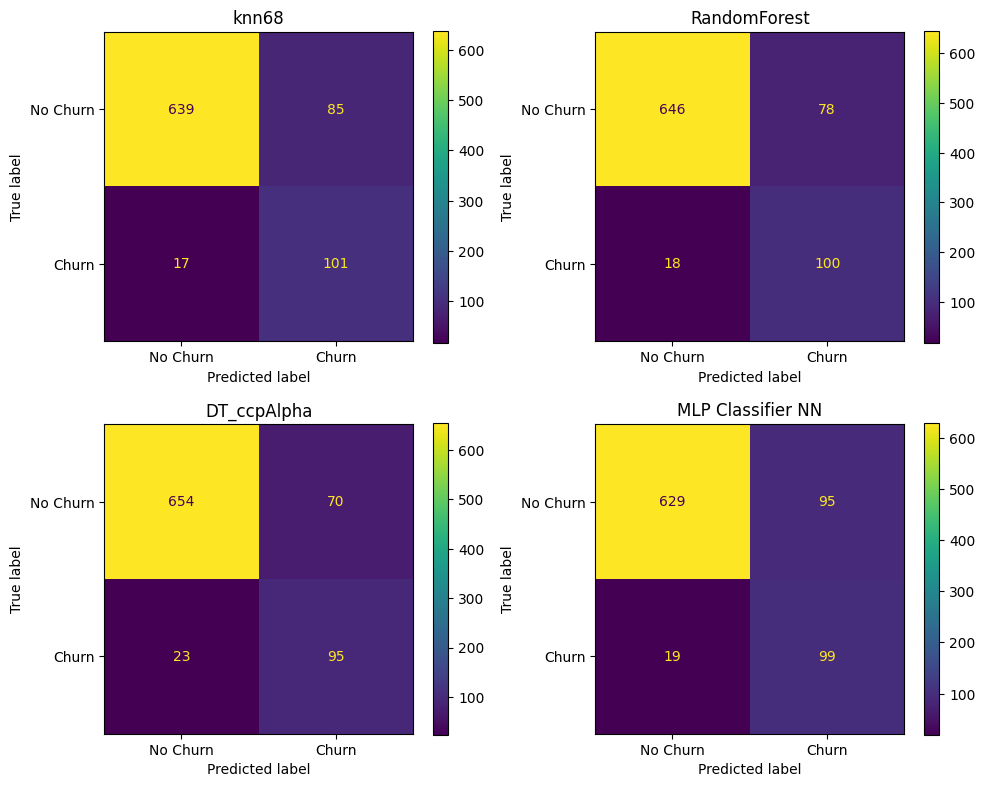

In [525]:
#models confusion matrix

cm_dict = {'knn68': cm_model_knn68, 'RandomForest' : cm_RF_model, 'DT_ccpAlpha': cm_DT_ccpalpha, 'MLP Classifier NN':cm_clf_NN}

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through models and plot confusion matrix in each subplot
for i, cm in enumerate(cm_dict.keys()):

    # Define display labels
    display_labels = ['No Churn', 'Churn']  # Replace with your desired labels

    # Create ConfusionMatrixDisplay with custom labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_dict.get(cm), display_labels=display_labels)

    # Plot the confusion matrix in the current subplot
    disp.plot(cmap='viridis',ax=axes[i])

    # Set title for the subplot
    axes[i].set_title(f'{cm}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the overall plot
plt.show()

# 5. **Evaluation and Main Conclusions**

## Models Evaluation:
The Random Forest using specific parameters (ccp_alpha=0.0015, max_depth=5, n_estimators=200) exposed slighly better performance when compared with the other selected models, evaluating by F1 and accuracy. However, the SVC, the kNN and the MLPClassifer also shown very good performances.

The Random Forest was the one with higher capacity to find the true positive cases with higher precision, but the kNN68 was the one with more balanced scores across the models with slighly better recall.  

## Mis-classification Problem:
The class False Positive (No churn predicted as Churn) is the one which results in more mis-classifications. It can be caused by the imbalanced dataset problem. The models can be good to predict the Churn cases, but they are not precise in the sense that we have high amount of False Positives.

## Still way for improvemnt:
These models still being able to be optimized. There are several possibilities to try to enhance the models performance, such as try the data imputation strategies, outlier handling, hyperparameter tunning (by using a GridSearch for example), etc.

## Machine Learning and Business problems resolution:
Depending on the business problem, the mis-classifications of specific classes can be critical or not, in our case would be needed a business evaluation to define what is the priority:
- offer more customer retention campaigns with lower precision and hit more clients;
- offer less campaigns with more precision, considering miss more risky clients in the campaigns.

That would involve the decision considering campaigns cost vs. impact of churn clients in the loss of revenue.

Considering the business problem and the models performance we tend to suggest the model with better F1, but mainly with higher recall in order to reach the higher amount of clients in the customer retention campaigns. Therefore, we suggest the usage of kNN68 model in to answer the Machine Learning problem.

## The main gain from Data Science effort
The main business gain from the data science effort did here is get more insights to support and antecipate business decisions by having an prediction/identification of a risky clients.

##Leasons learnt
The leassons learnt with this problem involves data preprocessing decisions, dimension reduction process, model and evaluate imbalanced datasets for binary classification and its constraints (evaluation metrics, CV and oversampling approaches)

## In summary
In summary, with this project we could find a models with good performance in the classification problem considering imbalanced dataset and also understand the some constraints of this kind of problem:
- The understanding of business goal/machine learning goal is important to define the evaluation metrics we will use;
- The analysis of NAs, class distribution, outliers, feature redundancy are important in the data preprocessing for this kind of problems;
- The holdout definition considering the strategy of model selection and the amount of models tested;
- The importace of Stratification in the holdout split and also in the Cross-Validation for effective model evaluation in the imbalanced scenario;
- The correct understanding of effects of oversampling in the Cross-Validation step (it need to be performed only in the train fold).
- The model evaluation considering the business goal/machine learning problem.
- SMOTE improved the Recall and F1 for all the models. Any of these models could be choose to resolve our Machine Learning problem:
  - the Random Forest exposed the best F-score (65.08%), the best accuracy (87.76%) and good recall (81.35%);
  - the kNN68 was the model with more balanced high scores. It had good F-score (64.95%), good accuracy (87.05%) and the best recall (85.59%).

